# Datos de la actividad fisica de las personas para el periodo 2017 - 2018 de NHANES

### Librerias

In [29]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno

### Importar funciones personalizadas

In [30]:
%run '../utils2.ipynb'

### Cargar datos de NHANES

In [31]:
(
    nhanes.load.load_NHANES_data(year='2017-2018')
)

,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,TypeOfMilkFirstFed1Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
SEQN,,,,,,,,,,,,,,,,,,,,,
93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never


In [32]:
# modificar nombres de las columnas con separadores

nhanes_raw_df = (
    nhanes.load.load_NHANES_data(year='2017-2018')
    .clean_names(case_type = 'snake')
)

nhanes_raw_df

,general_health_condition,ever_breastfed_or_fed_breastmilk,age_stopped_breastfeedingdays,age_first_fed_formuladays,age_stopped_receiving_formuladays,age_started_other_foodbeverage,age_first_fed_milkdays,type_of_milk_first_fed_whole_milk,type_of_milk_first_fed2_milk,type_of_milk_first_fed1_milk,...,days_smoked_cigs_during_past30_days,avg_cigarettesday_during_past30_days,tried_to_quit_smoking,times_stopped_smoking_cigarettes,how_long_were_you_able_to_stop_smoking,unit_of_measure_dayweekmonthyear_2_smq,current_selfreported_height_inches,current_selfreported_weight_pounds,tried_to_lose_weight_in_past_year,times_lost10_lbs_or_more_to_lose_weight
SEQN,,,,,,,,,,,,,,,,,,,,,
93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never


### Seleccion de variables a analizar

Para el analisis vamos a utilizar las variables de actividad fisica, fuma cigarrillo, edad, con diabetes y azucar en la sangre en gm

In [39]:
# Seleccion de las variables de tipo actividad
nhanes_df = (
    nhanes_raw_df.select_columns(
    '*activi*',
    'do_you_now_smoke_cigarettes',
    'age_in_years_at_screening',
    'doctor_told_you_have_diabetes',
    'total_sugars_gm_dr2_tot'
    )
    .rename_columns(
        {
            'vigorous_work_activity':'vigorous_work',
            'moderate_work_activity':'moderate_work',
            'vigorous_recreational_activities': 'vigorous_recreational',
            'moderate_recreational_activities':'moderate_recreational',
            'minutes_sedentary_activity':'minutes_sedentary',
            'do_you_now_smoke_cigarettes':'cigarettes',
            'age_in_years_at_screening':'age',
            'doctor_told_you_have_diabetes':'diabetes',
            'total_sugars_gm_dr2_tot':'sugar_gm'
        }
    )
    .replace(
        {
            'sugar_gm':{
                9999:np.nan,
                7777:np.nan
            },
            'diabetes':{
                'Borderline': np.nan
            }
        }
    )
    .missing.sort_variables_by_missingness()
    # eliminar todas las observaciones con diabetes nula ya que son pocas
    .dropna(    
        subset =['diabetes'],
        how='any'
    ) 
    # convierte la variale diabetes de tipo object a int
    .transform_column(  
        column_name = 'diabetes',
        function = lambda s: s.astype(int),
        elementwise = False
    )
)

nhanes_df

,cigarettes,minutes_sedentary,vigorous_work,moderate_work,vigorous_recreational,moderate_recreational,sugar_gm,diabetes,age
SEQN,,,,,,,,,
93703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0
93704.0,NaN,NaN,NaN,NaN,NaN,NaN,134.37,0,2.0
93705.0,Not at all,300.0,0.0,0.0,0.0,1.0,43.04,0,66.0
93706.0,NaN,240.0,0.0,0.0,0.0,1.0,NaN,0,18.0
93707.0,NaN,NaN,NaN,NaN,NaN,NaN,85.81,0,13.0
...,...,...,...,...,...,...,...,...,...
102951.0,NaN,NaN,NaN,NaN,NaN,NaN,62.08,0,4.0
102953.0,Not at all,360.0,1.0,1.0,0.0,0.0,NaN,0,42.0
102954.0,NaN,600.0,0.0,0.0,0.0,1.0,87.58,0,41.0


In [40]:

nhanes_df.dtypes

cigarettes                object
minutes_sedentary        float64
vigorous_work            float64
moderate_work            float64
vigorous_recreational    float64
moderate_recreational    float64
sugar_gm                 float64
diabetes                   int64
age                      float64
dtype: object

### Visualizacion de los valores faltantes por variable

<AxesSubplot:>

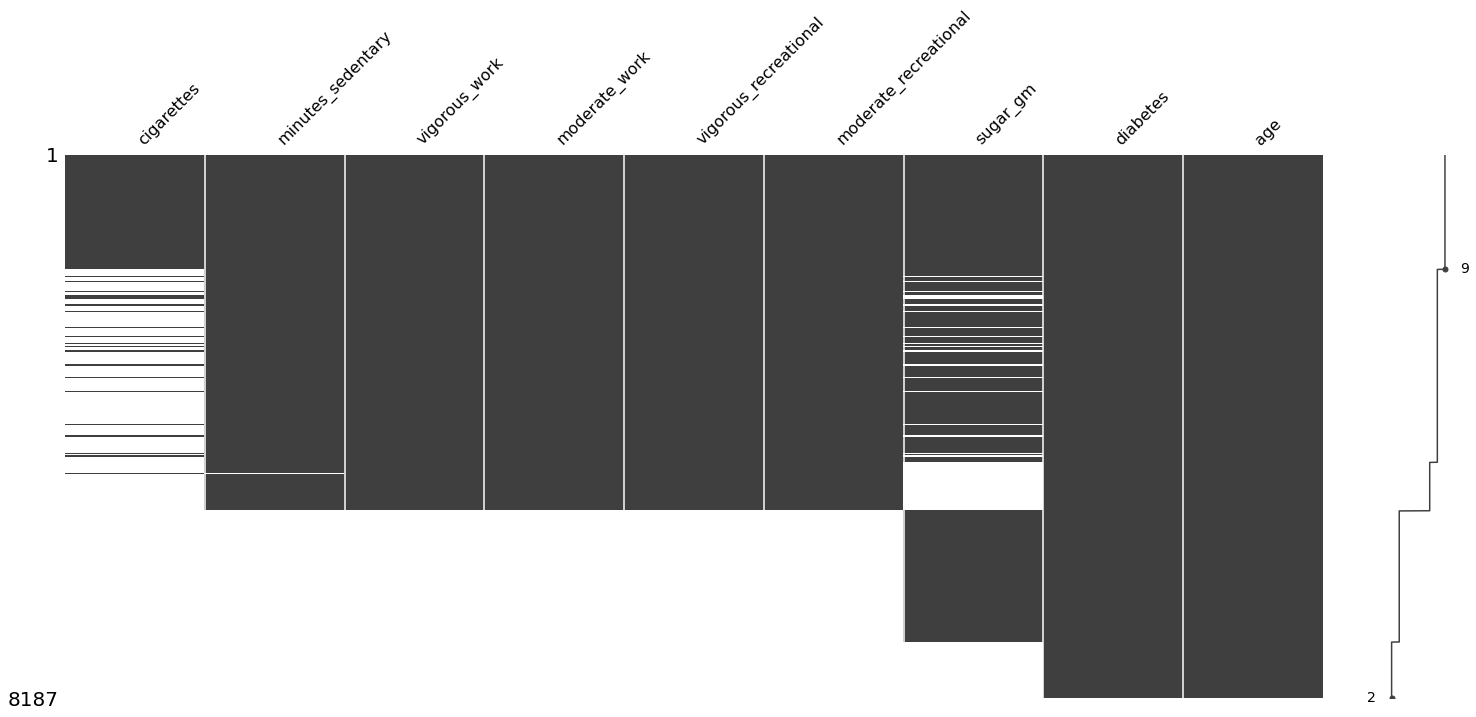

In [41]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort='descending')
)

La visualizacion nos indica que hay una gran numero de personas que omiten hablar sobre su actividad fisica. Una gran parte de ello no indica su cantidad de azucar en la sangre ni su condicion de fumador.

### Upsetplot para visualizar la relacion entre las variables

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

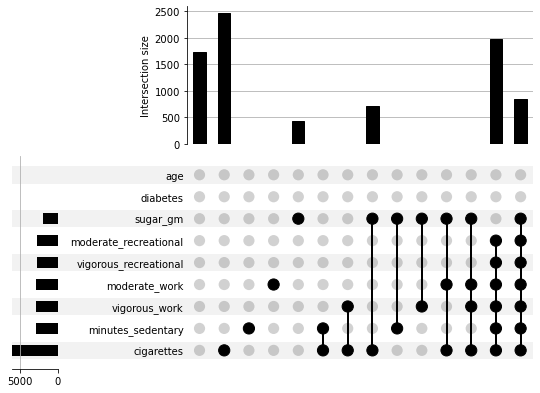

In [42]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .missing.missing_upsetplot()
)

### Eliminar algunos registros con valores faltantes para 7 variables

<AxesSubplot:>

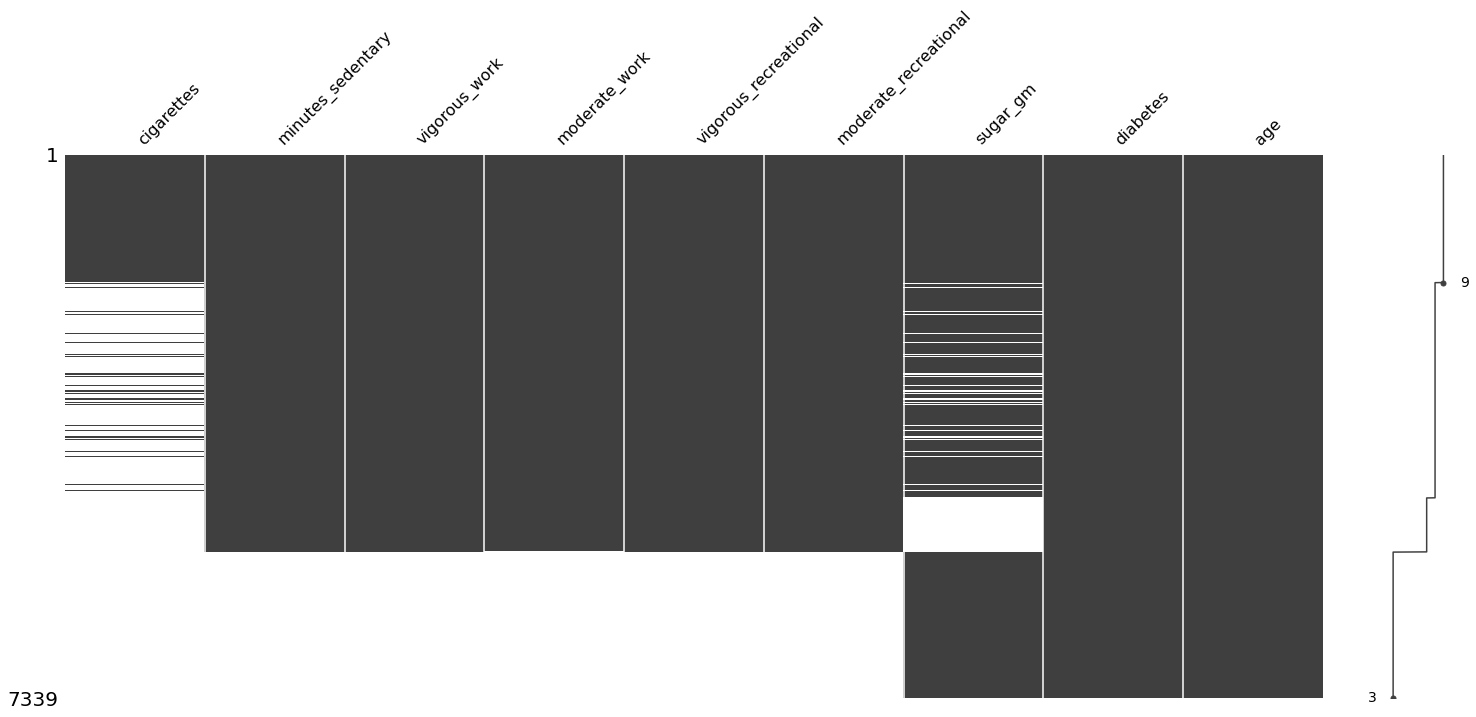

In [45]:
(
    nhanes_df
    .dropna(
        subset = [
            'cigarettes',
            'minutes_sedentary', 
            'vigorous_work', 
            'moderate_work', 
            'vigorous_recreational',
            'moderate_recreational', 
            'sugar_gm'
            ],
        how='all'
    )
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort='descending')
)